In [1]:
from pmdarima import auto_arima


In [2]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Carga y Preparación Datos

In [2]:
path='../data/raw/web.csv'
df_web=pd.read_csv(path)
df_web

,ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch
0,202201,272382,4838,33222,94248,1415,65373,25,167199,63649,39808,13798
1,202202,352581,5823,38570,109531,546,77209,26,176733,124861,45543,28656
2,202203,332955,4845,33956,97805,5444,83178,341,173514,104132,43583,15243
3,202204,282169,3711,45949,90689,1184,69335,162,162805,74044,39650,18510
4,202205,261829,9037,48685,92069,8648,70972,210,156011,44196,40472,20031
5,202206,201141,10727,38608,73421,1082,61455,2374,134355,15600,35272,13658
6,202207,206538,11023,38912,74564,909,66835,204,144300,11000,35674,12262
7,202208,259903,15743,47613,88335,7511,78704,14,172986,15205,42545,18902
8,202209,261618,14130,44164,83840,1773,58630,199,174125,41832,41167,24528
9,202210,396642,16321,53200,100262,2117,74040,874,203699,162588,45763,18063


**Información Columnas**



| Columna                        | Descripción procedencia                                      |
|-------------------------------|--------------------------------------------------------------------------------|
| `ID_Date`                     | Fecha usada para ordenar la serie temporal |
| `Unique_visitors`             | Número total de visitantes únicos a la web (variable objetivo)                |
| `PDFBrochuresDownloaded`      | Número de folletos PDF descargados por los usuarios    |
| `ProductConfigurator`         | Número de usos del configurador de producto en la web                         |
| `Product_configurator_Visists`| Número de visitas al configurador de producto                                 |
| `SocialNetworks`              | Tráfico desde redes sociales                                  |
| `DirectTraffic`               | Tráfico directo: usuarios que escriben la URL            |
| `EMail`                       | Tráfico desde campañas de correo electrónico                                  |
| `NaturalSearch`               | Tráfico orgánico desde buscadores como Google (SEO)                           |
| `OnlineMedia`                 | Tráfico desde medios online de pago  |
| `OtherReferrer`              |  Tráfico desde otras fuentes no categorizadas                                  |
| `PaidSearch`                  | Tráfico desde campañas de búsqueda pagada   |


## Transfomación de la Columna Date

Preparamos la columna `ID_Date` convirtiéndola en fechas mensuales, la usamos como índice temporal, ordenamos los datos y dejamos la serie lista para análisis mensual.


In [3]:
# Convertir ID_Date (tipo 202201) en una fecha real: 2022-01-01
df_web['Fecha'] = pd.to_datetime(df_web['ID_Date'].astype(str), format='%Y%m')

# Establecer Fecha como índice y ordenar
df_web.set_index('Fecha', inplace=True)
df_web.sort_index(inplace=True)

#Indicar que es una serie mensua
df_web = df_web.asfreq('MS')

# Para que no salga la hora
df_web.index = df_web.index.to_period('M')


In [4]:
df_web

,ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch
Fecha,,,,,,,,,,,,
2022-01,202201,272382,4838,33222,94248,1415,65373,25,167199,63649,39808,13798
2022-02,202202,352581,5823,38570,109531,546,77209,26,176733,124861,45543,28656
2022-03,202203,332955,4845,33956,97805,5444,83178,341,173514,104132,43583,15243
2022-04,202204,282169,3711,45949,90689,1184,69335,162,162805,74044,39650,18510
2022-05,202205,261829,9037,48685,92069,8648,70972,210,156011,44196,40472,20031
2022-06,202206,201141,10727,38608,73421,1082,61455,2374,134355,15600,35272,13658
2022-07,202207,206538,11023,38912,74564,909,66835,204,144300,11000,35674,12262
2022-08,202208,259903,15743,47613,88335,7511,78704,14,172986,15205,42545,18902
2022-09,202209,261618,14130,44164,83840,1773,58630,199,174125,41832,41167,24528


# Serie Unique Visitors

A continuación, observamos cómo se comporta la variable objetivo `Unique_visitors`, que queremos predecir. Para ello, graficamos su evolución mensual en el tiempo:

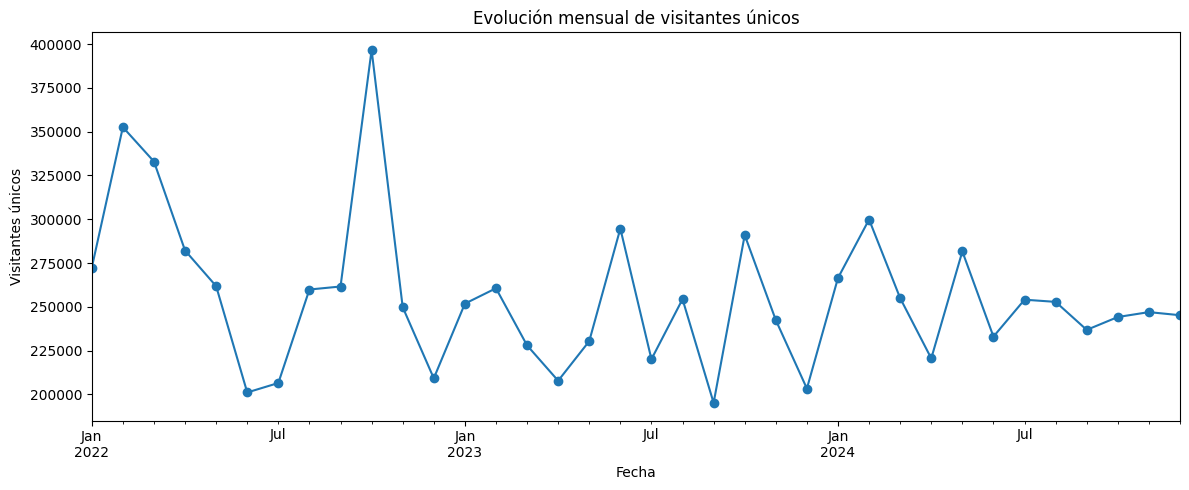

In [5]:
plt.figure(figsize=(12, 5))
df_web['Unique_visitors'].plot(marker='o', linestyle='-')
plt.title('Evolución mensual de visitantes únicos')
plt.xlabel('Fecha')
plt.ylabel('Visitantes únicos')
plt.tight_layout()
plt.show()


**Observaciones clave sobre la serie `Unique_visitors`**

- Picos de tráfico:
  - Se observan valores máximos especialmente en febrero de 2022 y septiembre de 2022.
  - También se registran aumentos destacados en enero de algunos años.

- Caídas pronunciadas:
  - El tráfico disminuye notablemente tras los picos.
  - En diciembre se detecta una caída recurrente del número de visitantes.

- **Estacionalidad**:
  - En enero suele haber una recuperación tras la bajada de diciembre.
  - Septiembre y octubre presentan subidas recurrentes que podrían asociarse a campañas o reinicio de actividad tras verano.

- **Tendencia general**:
  - A lo largo del periodo analizado, se observa una ligera tendencia descendente en el volumen de visitantes.
  - En los últimos meses, el comportamiento de la serie se muestra más estable.

## Descomposicón Serie

Se realiza la descomposición de la serie utilizando un modelo aditivo. Este tipo de modelo se aplica cuando se considera que la serie es el resultado de la suma de sus tres componentes principales:

- Serie original = Tendencia + Estacionalidad + Ruido

In [6]:
df_web.columns

Index(['ID_Date', 'Unique_visitors', 'PDFBrochuresDownloaded',
       'ProductConfigurator', 'Product_configurator_Visists', 'SocialNetworks',
       'DirectTraffic', 'EMail', 'NaturalSearch', 'OnlineMedia',
       'OtherReferrer', 'PaidSearch'],
      dtype='object')

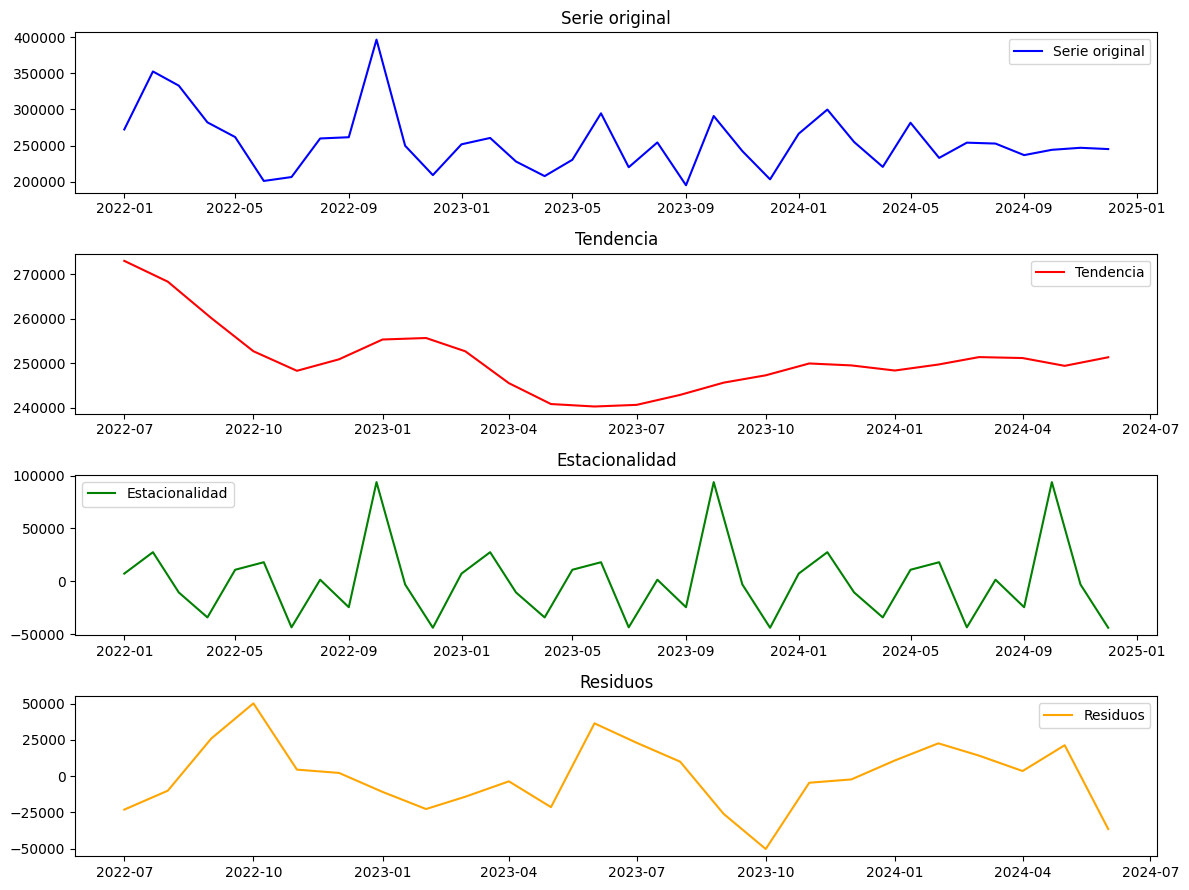

In [7]:
df_web.index = df_web.index.to_timestamp()
serie = df_web['Unique_visitors']

# Descomposición aditiva 
decomposition = seasonal_decompose(serie, model='additive', period=12) #periodo de 12 meses
# Tendencia/Estacionalidad
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuos = decomposition.resid

# Graficar la serie original y las tres componentes
plt.figure(figsize=(12, 9))

plt.subplot(411)
plt.plot(serie, label='Serie original', color='blue')
plt.title('Serie original')
plt.legend()

plt.subplot(412)
plt.plot(tendencia, label='Tendencia', color='red')
plt.title('Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(estacionalidad, label='Estacionalidad', color='green')
plt.title('Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(residuos, label='Residuos', color='orange')
plt.title('Residuos')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
df_web.columns

Index(['ID_Date', 'Unique_visitors', 'PDFBrochuresDownloaded',
       'ProductConfigurator', 'Product_configurator_Visists', 'SocialNetworks',
       'DirectTraffic', 'EMail', 'NaturalSearch', 'OnlineMedia',
       'OtherReferrer', 'PaidSearch'],
      dtype='object')

**Descomposición Serie**

- Tendencia: Presenta una caída progresiva desde mediados de 2022 hasta mediados de 2023, seguida de una ligera recuperación y estabilización en 2024.

- Estacionalidad: Se detectan patrones que se repiten a lo largo del tiempo, con subidas y bajadas cíclicas, lo que confirma la presencia de estacionalidad anual.

- Residuos: No muestran una estructura clara, lo cual es positivo, ya que indica que la mayor parte de la variación ha sido explicada por la tendencia.

## Coeficientes Serie

**Justificación inicial de parámetros SARIMA**

- `d = 1` 
  Vemos claramente una tendencia descendente en la serie.  
  Para eliminarla, parte diferencial del modelo.

- `D = 1`, `s = 12`
  Observamos que se repiten los mismos patrones cada año, especialmente los picos en octubre y las caídas en enero.  
  Esto indica estacionalidad anual, así que usamos `D = 1` para eliminarla y `s = 12` porque trabajamos con datos mensuales.

- `q`, `Q` (componentes de errores) 
  Los residuos tienen ciertas oscilaciones, pero no es clara su estructura.  
  Por tanto, vamos a probar con distintos valores (`q = 0` o `1`, `Q = 0` o `1`) y elegir los que mejor se ajusten.

- `p`, `P` (componentes autoregresivos) 
  Aún no sabemos si los valores anteriores afectan directamente a los actuales.  
  Para decidirlo, vamos a usar los gráficos *ACF y PACF*, que nos dirán si existe esa relación.


## ACF Y PACF

Número de datos: 36 → Usaremos hasta 18 lags


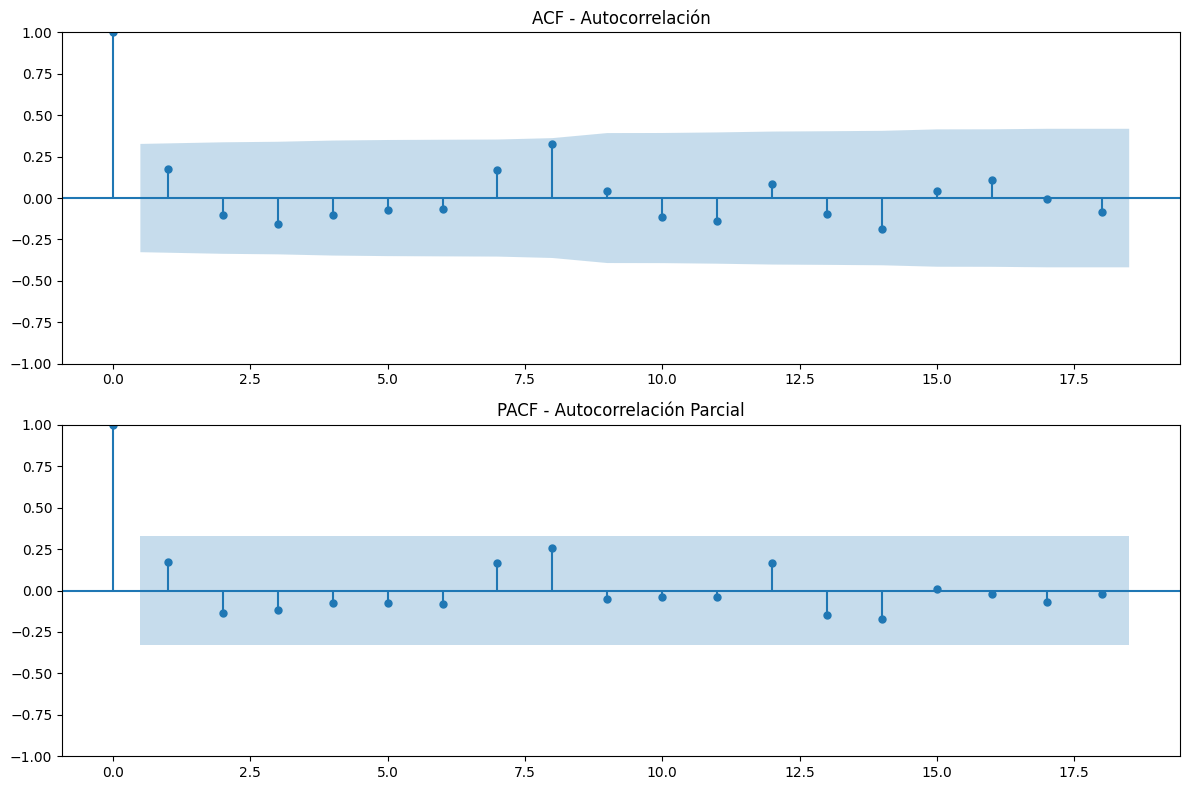

In [17]:
n_datos = len(serie)
max_lags =18 # máximo permitido por PACF

print(f"Número de datos: {n_datos} → Usaremos hasta {max_lags} lags")

# Crear los gráficos
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Gráfico ACF
plot_acf(serie, lags=max_lags, ax=axes[0])
axes[0].set_title('ACF - Autocorrelación')

# Gráfico PACF
plot_pacf(serie, lags=max_lags, ax=axes[1], method='ywm')
axes[1].set_title('PACF - Autocorrelación Parcial')

plt.tight_layout()
plt.show()

In [18]:
# Definir y ajustar el modelo
modelo_sarima = SARIMAX(train, 
                        order=(1, 1, 1), 
                        seasonal_order=(0, 1, 0, 12), 
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

modelo_ajustado = modelo_sarima.fit()


NameError: name 'SARIMAX' is not defined

In [19]:
modelo_ajustado = modelo_sarima.fit()


NameError: name 'modelo_sarima' is not defined